# Курсовая работа

## Вариант №29

 Ансамбль нейронных сетей типа бэггинг на основе сверточной нейросетевой модели с полносвязным классификатором

## Тема: Разработать приложение на языке Python и необходимых библиотек машинного и глубокого обучения на основе классификационной моедли, заданной в интервале, x, которое определяет попытки сетевых вторжений на основе данных сетевого трафика

### Выполнил: Губайдулин Владислав. Группа: 4232М

Ход работы:

Библиотеки и пакеты необходимые для реализации приложения

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import os
import pandas as pd
from pandas.plotting import scatter_matrix
import numpy as np
import seaborn as sns
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import ElasticNet, LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

Константы, которые необходимы для реализации приложения

In [2]:
_INCLUDED_CLASSES = ['normal.', 'smurf.']

#### 1. Был выполнен разведочный анализ данных.

1.1 Был загружен размеченный датасет.

In [3]:
LABELED_DATASET = 'C:\\Users\\Gubay\\OneDrive\\Documents\\Archive_University\\Мага_3\\ml_course_work\\datasets\\kdd_10000_labeled.csv'
#LABELED_DATASET = 'C:\\Users\\vgubaydulin\\Desktop\\Вуз\\МАГ_2\\ml_course\\datasets\\kdd_10000_labeled.csv'
labled_data = pd.read_csv(LABELED_DATASET)

1.2 Было произведено ознакомление с данными с помощью методов описательной статистики

In [4]:
labled_data.head()    # первые 5 строк

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,http,SF,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
3,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
4,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.


In [5]:
labled_data.shape    # размерность набора данных

(10000, 42)

In [6]:
labled_data.dtypes   # типы атрибутов в данных

duration                         int64
protocol_type                   object
service                         object
flag                            object
src_bytes                        int64
dst_bytes                        int64
land                             int64
wrong_fragment                   int64
urgent                           int64
hot                              int64
num_failed_logins                int64
logged_in                        int64
num_compromised                  int64
root_shell                       int64
su_attempted                     int64
num_root                         int64
num_file_creations               int64
num_shells                       int64
num_access_files                 int64
num_outbound_cmds                int64
is_host_login                    int64
is_guest_login                   int64
count                            int64
srv_count                        int64
serror_rate                    float64
srv_serror_rate          

In [7]:
labled_data.info()    # получение краткого описания данных

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     10000 non-null  int64  
 1   protocol_type                10000 non-null  object 
 2   service                      10000 non-null  object 
 3   flag                         10000 non-null  object 
 4   src_bytes                    10000 non-null  int64  
 5   dst_bytes                    10000 non-null  int64  
 6   land                         10000 non-null  int64  
 7   wrong_fragment               10000 non-null  int64  
 8   urgent                       10000 non-null  int64  
 9   hot                          10000 non-null  int64  
 10  num_failed_logins            10000 non-null  int64  
 11  logged_in                    10000 non-null  int64  
 12  num_compromised              10000 non-null  int64  
 13  root_shell       

In [8]:
# Необходимо удалить значения в атрибуте class, 
# которые не равны 'normal.' или 'smurf.'
labled_data = labled_data[(labled_data['class'] == _INCLUDED_CLASSES[0]) | (labled_data['class'] == _INCLUDED_CLASSES[1])]

In [9]:
# Необходим перевод атриубта class в значение типа int, где 
# 0 - normal, 1- smurf
labled_data['class'] = labled_data['class'].replace({
    'normal.': 0, 
    'smurf.': 1})
labled_data['class'] = labled_data['class'].astype(int)
labled_data.dtypes   # типы атрибутов в данных

duration                         int64
protocol_type                   object
service                         object
flag                            object
src_bytes                        int64
dst_bytes                        int64
land                             int64
wrong_fragment                   int64
urgent                           int64
hot                              int64
num_failed_logins                int64
logged_in                        int64
num_compromised                  int64
root_shell                       int64
su_attempted                     int64
num_root                         int64
num_file_creations               int64
num_shells                       int64
num_access_files                 int64
num_outbound_cmds                int64
is_host_login                    int64
is_guest_login                   int64
count                            int64
srv_count                        int64
serror_rate                    float64
srv_serror_rate          

In [10]:
# Необходимо перекодировать значения в столбцах protocol_type, service, flag

labled_data_encoded = labled_data.copy(deep=True)
label_encoder = LabelEncoder()
labled_data_encoded['protocol_type_encoded'] = label_encoder.fit_transform(labled_data_encoded['protocol_type'])
labled_data_encoded['service_encoded'] = label_encoder.fit_transform(labled_data_encoded['service'])
labled_data_encoded['flag_encoded'] = label_encoder.fit_transform(labled_data_encoded['flag'])

labled_data_encoded = labled_data_encoded.drop('protocol_type', axis=1)
labled_data_encoded = labled_data_encoded.drop('service', axis=1)
labled_data_encoded = labled_data_encoded.drop('flag', axis=1)

labled_data = labled_data_encoded.copy(deep=True)

In [11]:
labled_data.describe()    # сводка по числовым атрибутам

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class,protocol_type_encoded,service_encoded,flag_encoded
count,9994.000000,9994.000000,9994.000000,9994.0,9994.0,9994.0,9994.000000,9994.0,9994.000000,9994.000000,...,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,2.623574,514.391335,3277.123074,0.0,0.0,0.0,0.036522,0.0,0.757054,0.000300,...,0.273052,0.017691,0.000964,0.000310,0.000826,0.000825,0.220832,0.791075,5.422554,2.996298
std,164.818085,687.724887,8778.309823,0.0,0.0,0.0,0.839560,0.0,0.428884,0.022366,...,0.414350,0.028613,0.015370,0.009484,0.028309,0.028392,0.414829,0.440809,1.614522,0.098453
min,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,222.000000,238.000000,0.0,0.0,0.0,0.000000,0.0,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,3.000000
50%,0.000000,293.000000,891.000000,0.0,0.0,0.0,0.000000,0.0,1.000000,0.000000,...,0.030000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,3.000000
75%,0.000000,1032.000000,2736.750000,0.0,0.0,0.0,0.000000,0.0,1.000000,0.000000,...,0.500000,0.030000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,3.000000
max,12454.000000,19721.000000,271733.000000,0.0,0.0,0.0,30.000000,0.0,1.000000,2.000000,...,1.000000,1.000000,1.000000,0.840000,1.000000,1.000000,1.000000,2.000000,10.000000,3.000000


1.3 Были проведены одномерная и многомерная визуализация

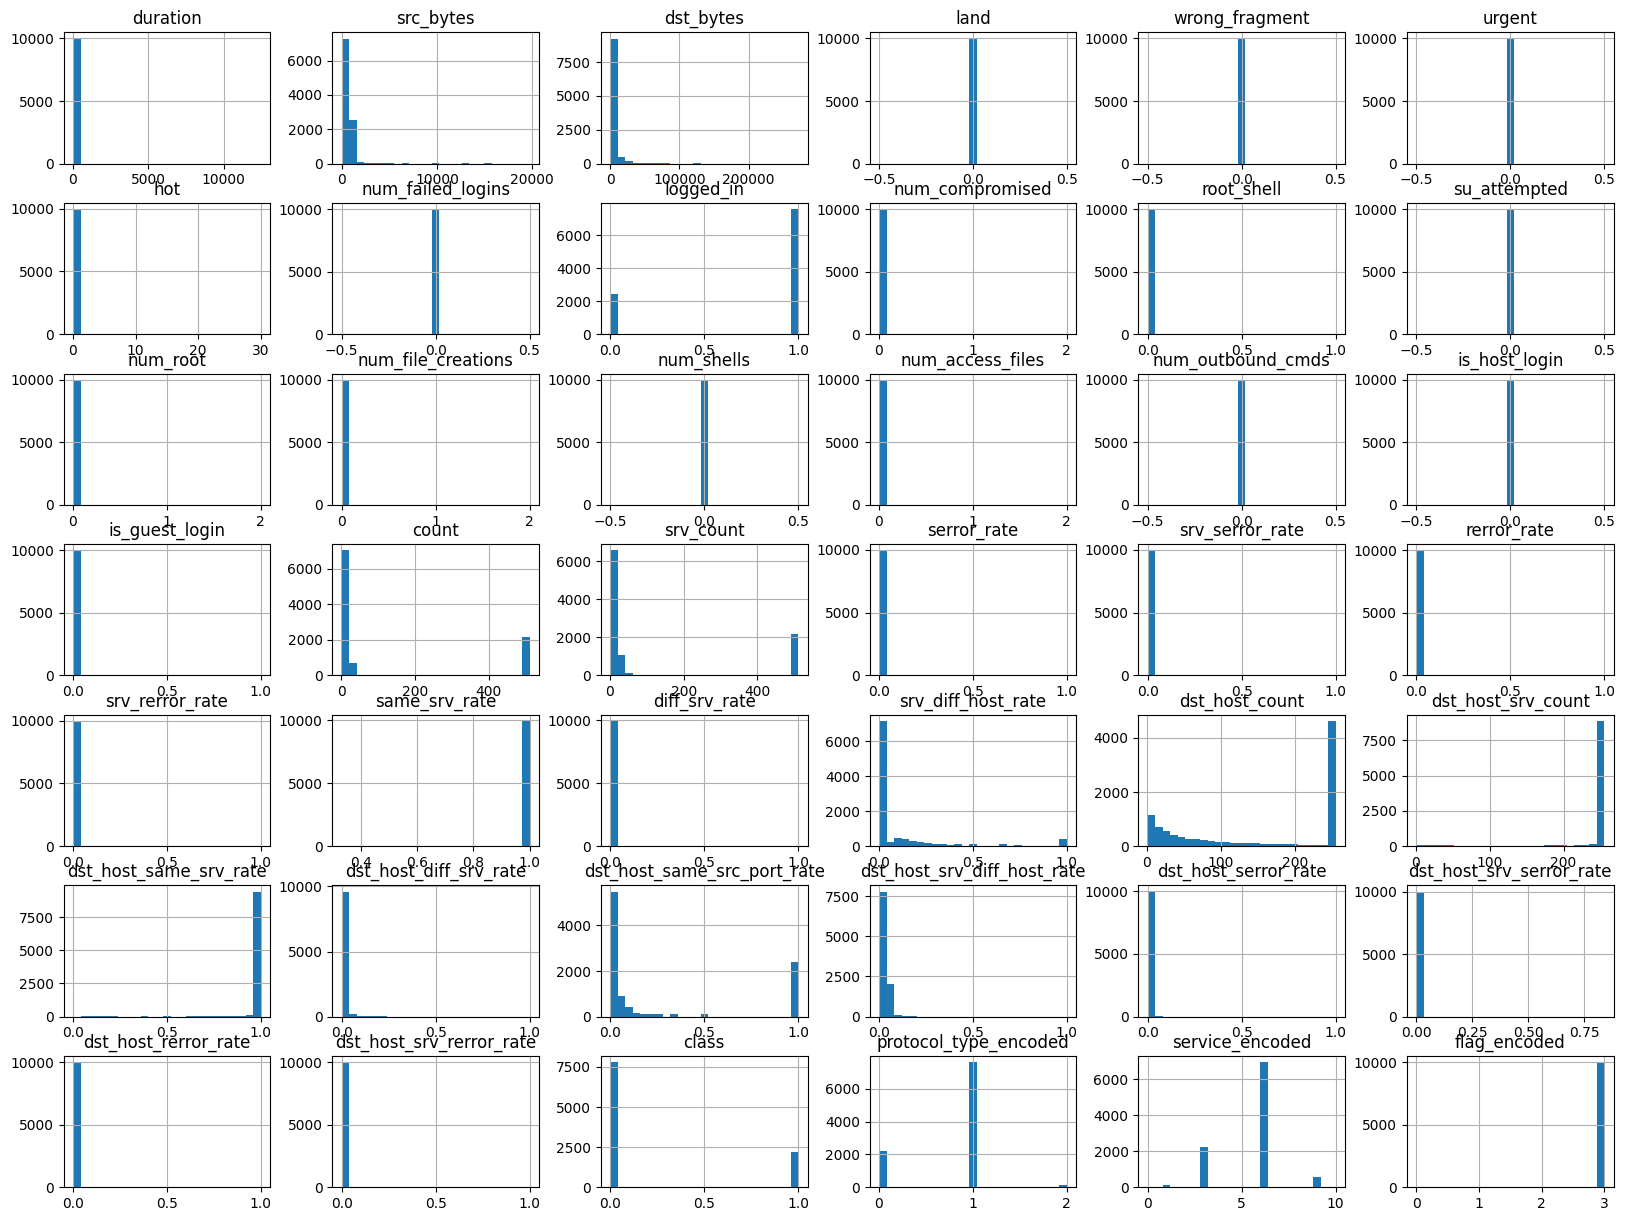

In [12]:
labled_data.hist(bins=25, figsize=(20,15))    # 1D-графики: гистограммы
plt.show()

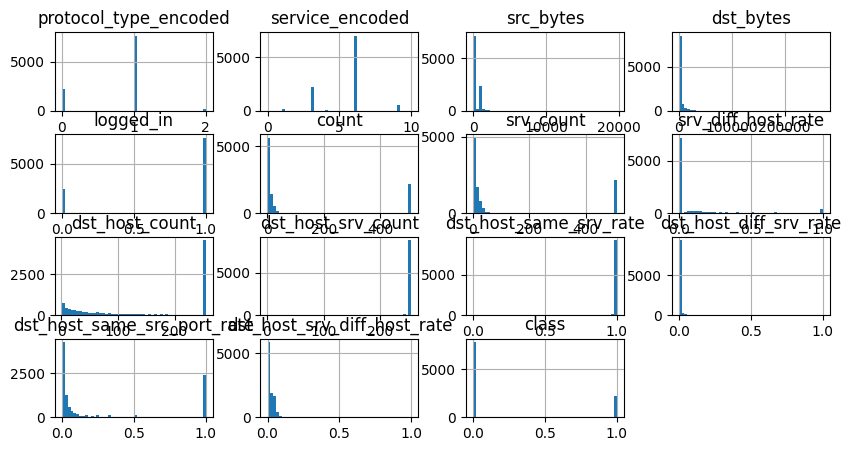

In [13]:
# Были выбраны следующие значения для детальной визуалзиаци, т.к.
# их значения изменяются в датасете

sub_init_labled_data = pd.DataFrame({
    'protocol_type_encoded': labled_data['protocol_type_encoded'],
    'service_encoded': labled_data['service_encoded'],
    'src_bytes' : labled_data["src_bytes"],
    'dst_bytes': labled_data["dst_bytes"],
    'logged_in': labled_data["logged_in"],
    'count': labled_data["count"],
    'srv_count': labled_data["srv_count"],
    'srv_diff_host_rate': labled_data["srv_diff_host_rate"],
    'srv_diff_host_rate': labled_data["srv_diff_host_rate"],
    'dst_host_count': labled_data['dst_host_count'],
    'dst_host_srv_count': labled_data['dst_host_srv_count'],
    'dst_host_same_srv_rate': labled_data['dst_host_same_srv_rate'],
    'dst_host_diff_srv_rate': labled_data['dst_host_diff_srv_rate'],
    'dst_host_same_src_port_rate': labled_data['dst_host_same_src_port_rate'],
    'dst_host_srv_diff_host_rate': labled_data['dst_host_srv_diff_host_rate'],
    'class': labled_data['class']
})
sub_init_labled_data.hist(bins=50, figsize=(10,5))
plt.show()

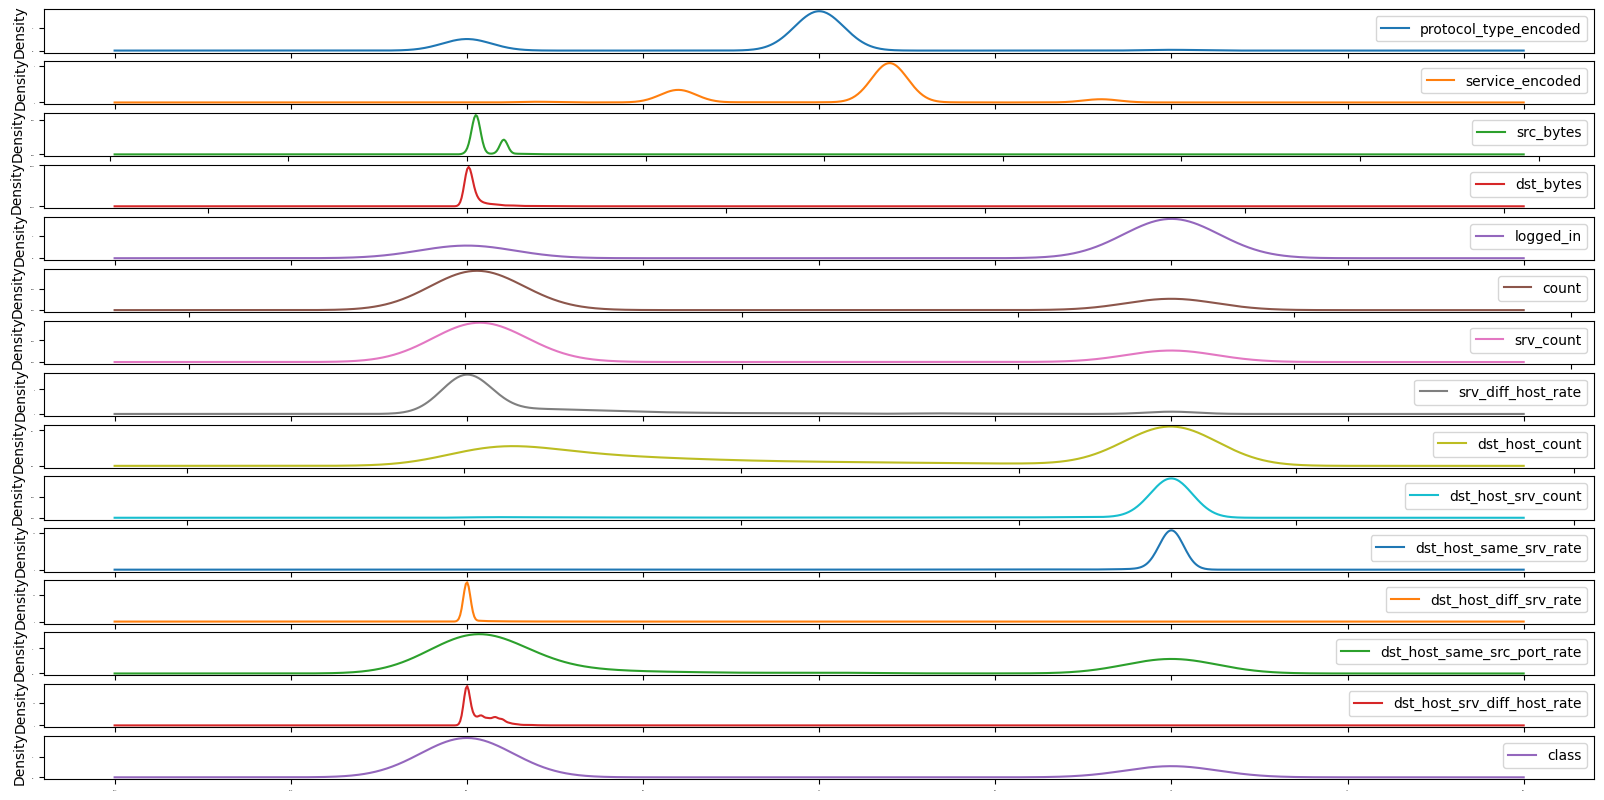

In [14]:
sub_init_labled_data.plot(kind='density', subplots=True, sharex=False,\
                  legend=True, fontsize=1, figsize=(20,10))
plt.show()

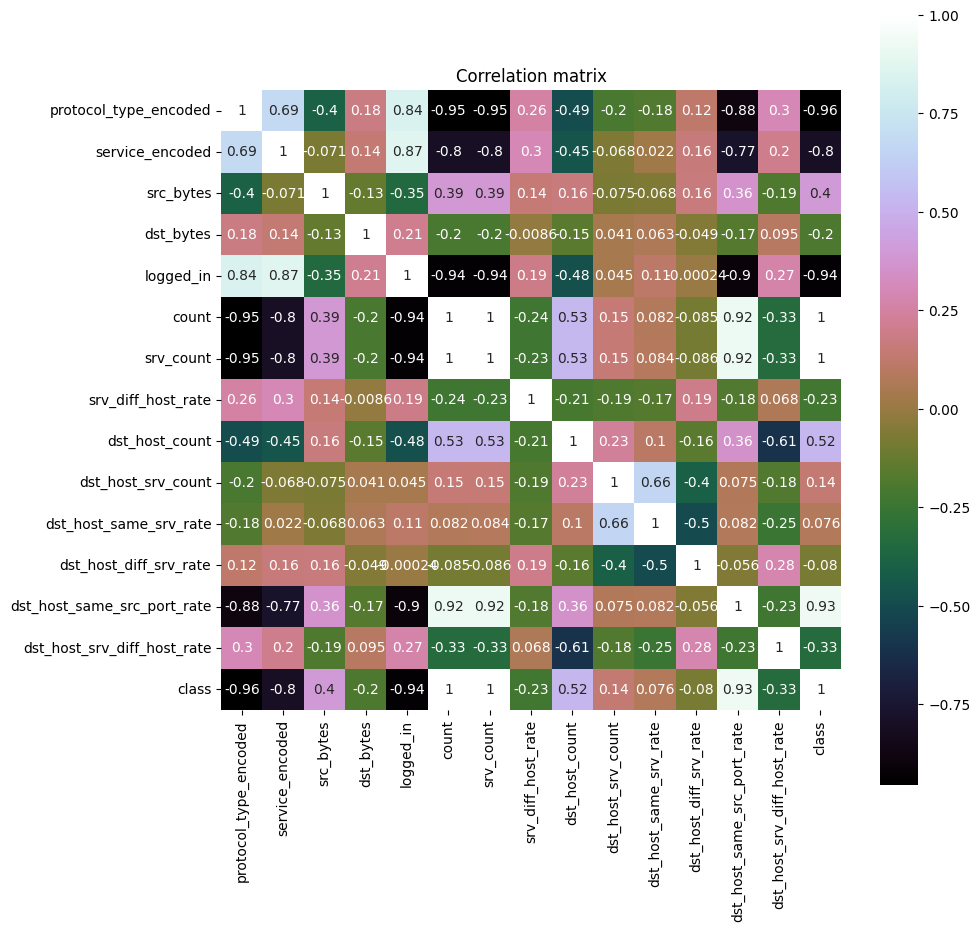

In [15]:
# многомерные графики
# график корреляционной матрицы

correlation = sub_init_labled_data.corr()
plt.figure(figsize=(10, 10))
plt.title('Correlation matrix')
sns.heatmap(correlation, vmax=1, square=True, annot=True, cmap='cubehelix')
plt.show()

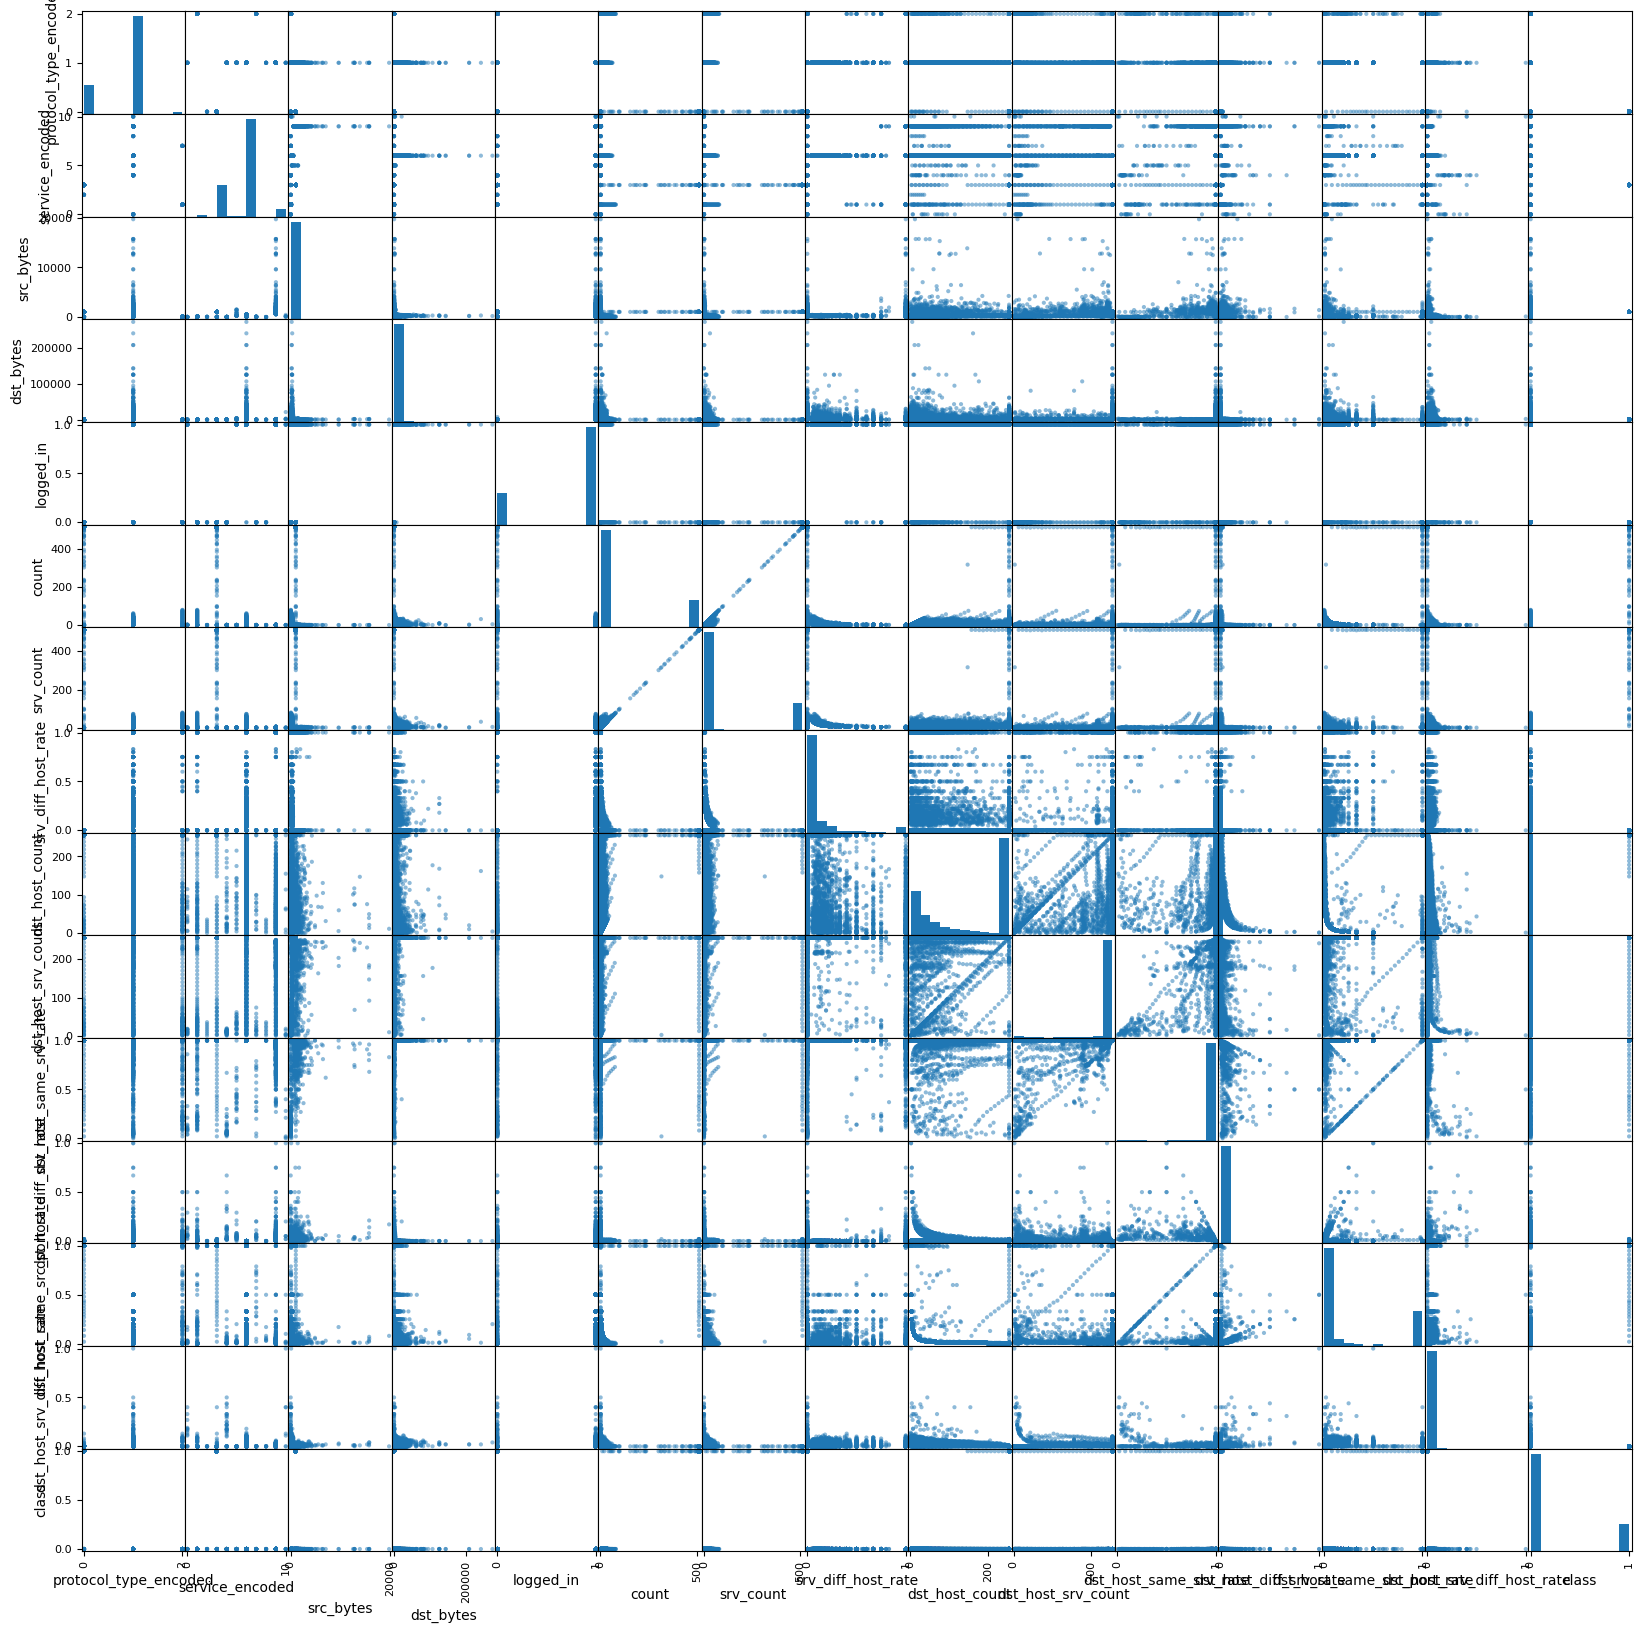

In [16]:
scatter_matrix(sub_init_labled_data, figsize=(20, 20)) # диаграмма рассеяния
plt.show()

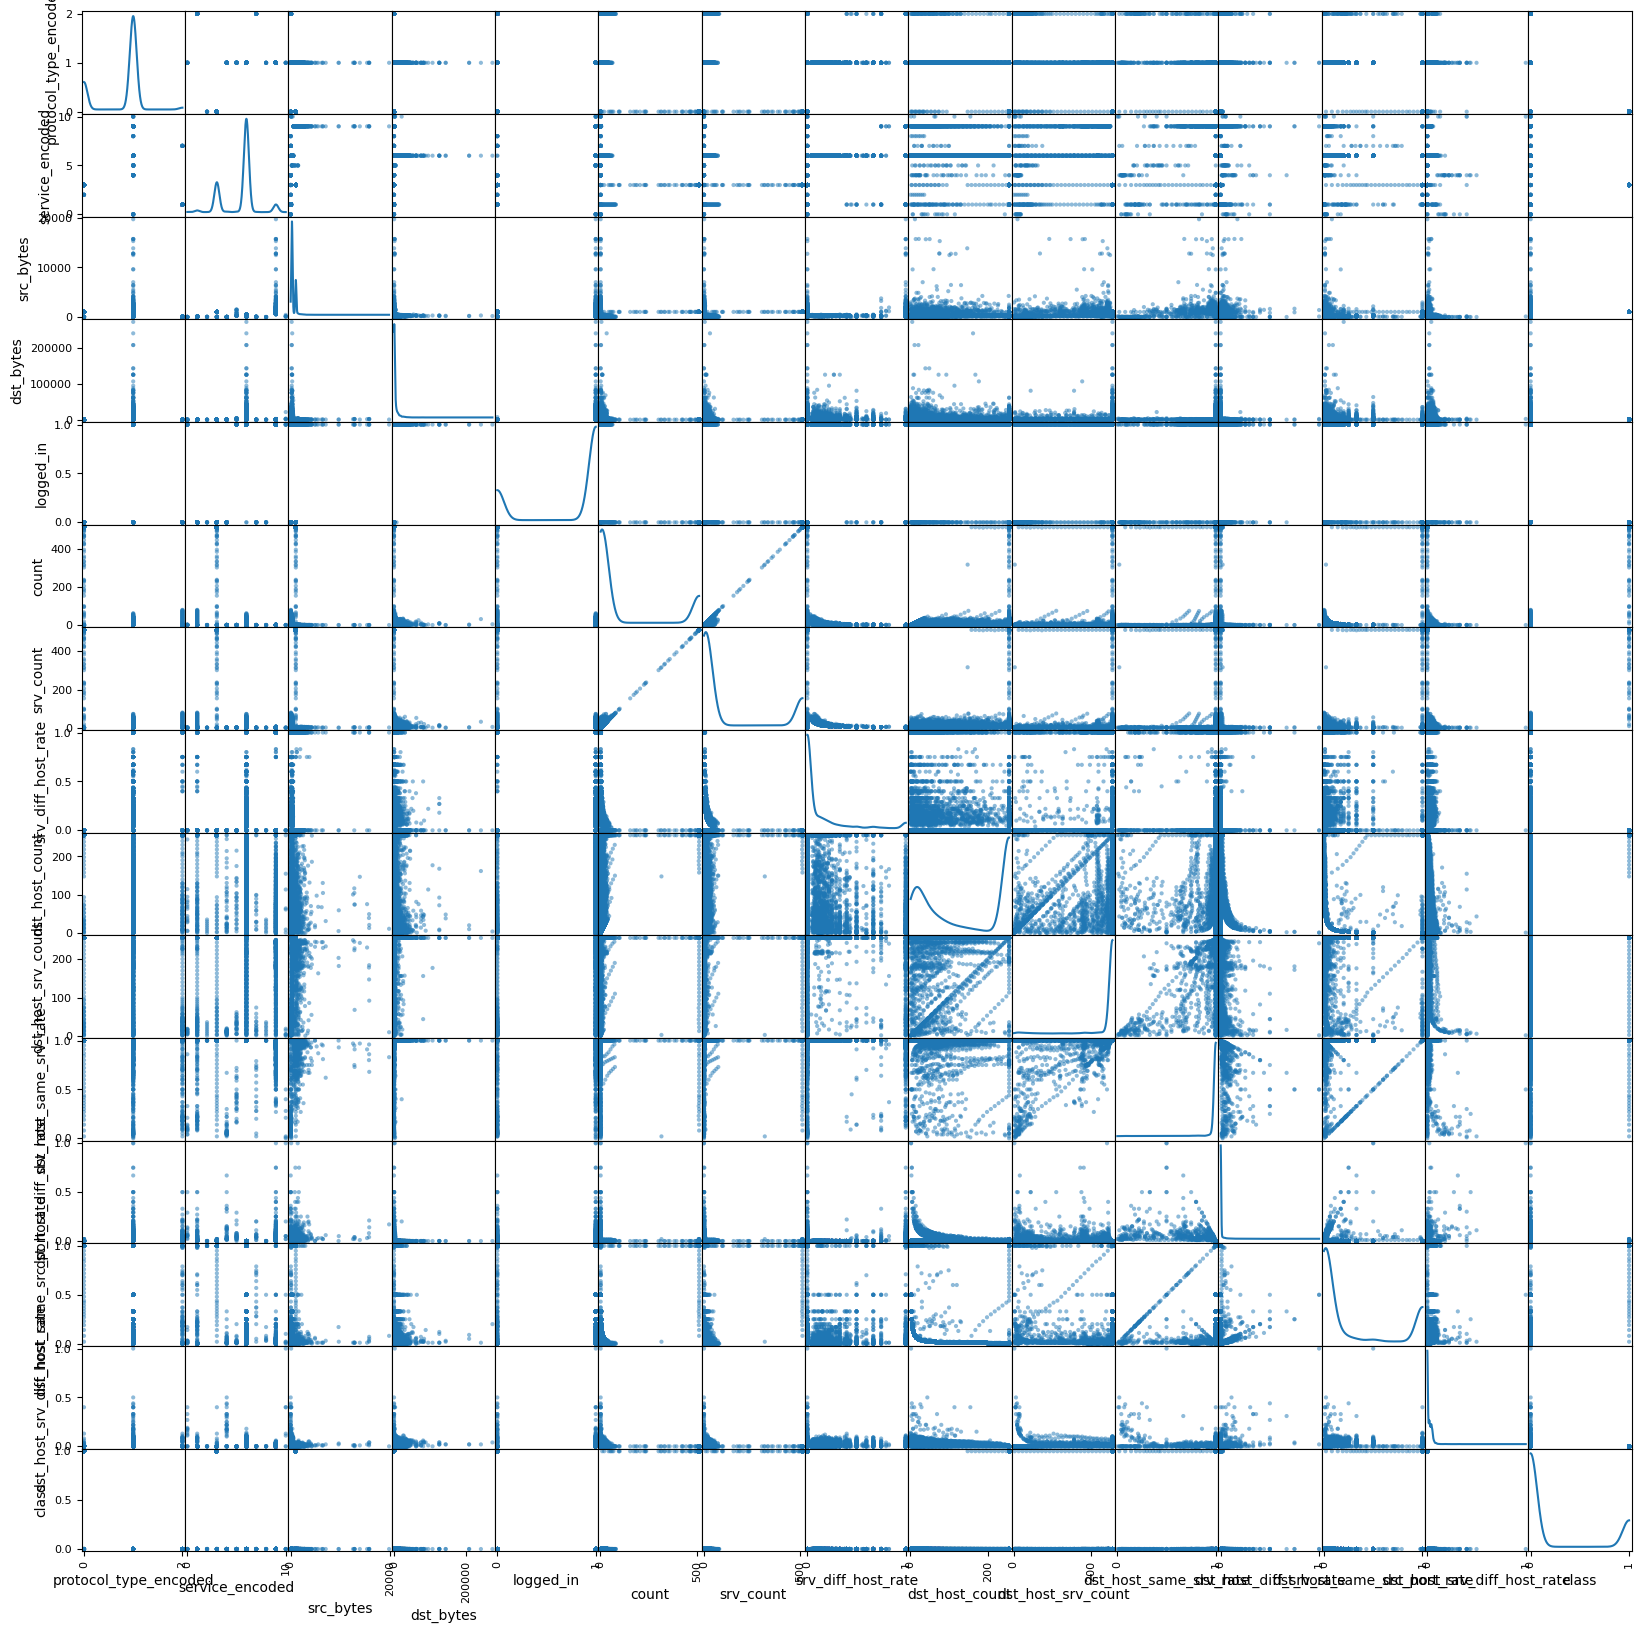

In [17]:
# диаграмма рассяния для всех атрибутов с диагональю kde

scatter_matrix(sub_init_labled_data, figsize=(20, 20), diagonal='kde') # диаграмма рассеяния
plt.show()

1.4 Проанализирована корреляционная зависимость между признакам

In [18]:
correlation = labled_data_encoded.corr()
correlation

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class,protocol_type_encoded,service_encoded,flag_encoded
duration,1.000000,-0.004599,0.013254,NaN,NaN,NaN,0.006031,NaN,0.008950,0.675932,...,-0.008065,0.017810,0.105723,0.581209,0.026246,0.066117,-0.008475,0.007571,0.041229,0.000599
src_bytes,-0.004599,1.000000,-0.132985,NaN,NaN,NaN,0.028639,NaN,-0.351698,-0.002304,...,0.358569,-0.187017,0.065189,-0.008098,-0.018322,-0.021195,0.400705,-0.395293,-0.071399,0.023397
dst_bytes,0.013254,-0.132985,1.000000,NaN,NaN,NaN,-0.000805,NaN,0.210937,0.017765,...,-0.174966,0.095232,0.011795,0.002038,-0.010007,-0.008729,-0.198756,0.177115,0.138317,-0.018611
land,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
wrong_fragment,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
urgent,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
hot,0.006031,0.028639,-0.000805,NaN,NaN,NaN,1.000000,NaN,0.024644,0.004745,...,-0.025822,-0.025399,-0.002650,-0.001297,-0.001270,-0.001265,-0.023160,0.020620,-0.010205,0.001636
num_failed_logins,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
logged_in,0.008950,-0.351698,0.210937,NaN,NaN,NaN,0.024644,NaN,1.000000,0.007603,...,-0.901985,0.272793,0.030355,0.018529,-0.049809,-0.049272,-0.939777,0.836703,0.865943,0.035575
num_compromised,0.675932,-0.002304,0.017765,NaN,NaN,NaN,0.004745,NaN,0.007603,1.000000,...,-0.005822,-0.005171,-0.000841,-0.000439,0.031217,0.078400,-0.007145,0.006362,0.026970,0.000505


In [19]:
correlation = sub_init_labled_data.corr()
correlation

,protocol_type_encoded,service_encoded,src_bytes,dst_bytes,logged_in,count,srv_count,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,class
protocol_type_encoded,1.000000,0.685927,-0.395293,0.177115,0.836703,-0.950100,-0.949922,0.255158,-0.490883,-0.201416,-0.177895,0.120816,-0.881583,0.299571,-0.955443
service_encoded,0.685927,1.000000,-0.071399,0.138317,0.865943,-0.800184,-0.800232,0.303159,-0.452138,-0.068090,0.021581,0.155858,-0.774831,0.203519,-0.798854
src_bytes,-0.395293,-0.071399,1.000000,-0.132985,-0.351698,0.394211,0.393276,0.144965,0.161739,-0.075238,-0.067767,0.164812,0.358569,-0.187017,0.400705
dst_bytes,0.177115,0.138317,-0.132985,1.000000,0.210937,-0.200133,-0.200010,-0.008602,-0.154461,0.040629,0.063281,-0.049318,-0.174966,0.095232,-0.198756
logged_in,0.836703,0.865943,-0.351698,0.210937,1.000000,-0.935861,-0.935074,0.186726,-0.480120,0.044875,0.107397,-0.000236,-0.901985,0.272793,-0.939777
count,-0.950100,-0.800184,0.394211,-0.200133,-0.935861,1.000000,0.999685,-0.235725,0.529061,0.145343,0.082243,-0.084876,0.919361,-0.334540,0.995566
srv_count,-0.949922,-0.800232,0.393276,-0.200010,-0.935074,0.999685,1.000000,-0.233343,0.528531,0.147078,0.083768,-0.086109,0.919008,-0.334081,0.995206
srv_diff_host_rate,0.255158,0.303159,0.144965,-0.008602,0.186726,-0.235725,-0.233343,1.000000,-0.212958,-0.189509,-0.169998,0.191702,-0.177387,0.067548,-0.226853
dst_host_count,-0.490883,-0.452138,0.161739,-0.154461,-0.480120,0.529061,0.528531,-0.212958,1.000000,0.232865,0.103022,-0.155545,0.355131,-0.611534,0.520209
dst_host_srv_count,-0.201416,-0.068090,-0.075238,0.040629,0.044875,0.145343,0.147078,-0.189509,0.232865,1.000000,0.663344,-0.404123,0.074699,-0.176675,0.138233


- Атрибуты имеющие наибольшую положительную корреляцию к атрибуту class: count, srv_count, dst_host_same_src_port_rate, dst_host_count
- Атрибуты имеющие наибольшую отрицательную корреляцию к атрибуту class: logged_in

1.5 Был сформирован преобразованный исходный набор

In [20]:
labled_result_data = pd.DataFrame({
    'protocol_type_encoded': labled_data['protocol_type_encoded'],
    'service_encoded': labled_data['service_encoded'],
    'logged_in': labled_data["logged_in"],
    'count': labled_data["count"],
    'srv_count': labled_data["srv_count"],
    'dst_host_count': labled_data['dst_host_count'],
    'dst_host_same_src_port_rate': labled_data['dst_host_same_src_port_rate'],
    'class': labled_data['class']
})
labled_result_data.head()

,protocol_type_encoded,service_encoded,logged_in,count,srv_count,dst_host_count,dst_host_same_src_port_rate,class
0,1,6,1,8,8,9,0.11,0
1,1,6,1,8,8,19,0.05,0
2,1,6,1,8,8,29,0.03,0
3,1,6,1,6,6,39,0.03,0
4,1,6,1,6,6,49,0.02,0


In [21]:
labled_result_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9994 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   protocol_type_encoded        9994 non-null   int32  
 1   service_encoded              9994 non-null   int32  
 2   logged_in                    9994 non-null   int64  
 3   count                        9994 non-null   int64  
 4   srv_count                    9994 non-null   int64  
 5   dst_host_count               9994 non-null   int64  
 6   dst_host_same_src_port_rate  9994 non-null   float64
 7   class                        9994 non-null   int32  
dtypes: float64(1), int32(3), int64(4)
memory usage: 585.6 KB


In [22]:
labled_result_data.to_csv('datasets\\kdd_10000_labled_modified.csv', index=False)

#### 2. Набор данных был проверен на сбалансированность классов.

Axes(0.125,0.11;0.775x0.77)
   class  count
0      0   7787
1      1   2207
normal = 0
smurf = 1


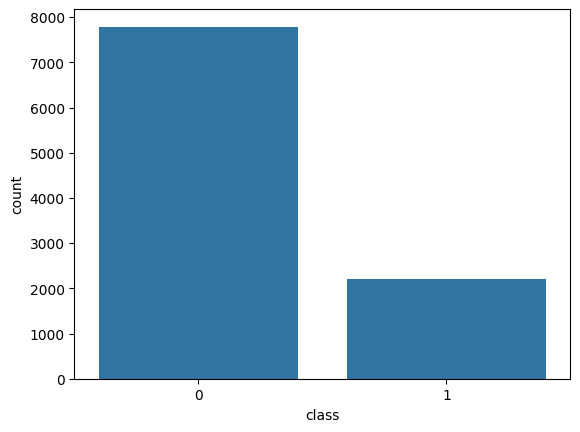

In [23]:
class_value_count = labled_result_data['class'].value_counts().reset_index()
print(sns.barplot(x = 'class', y = 'count', data = class_value_count))
print(class_value_count)
print('normal = 0\nsmurf = 1')

Набор данных несбалансирован.